In [1]:
import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
sys.path.append('/home/antolikjan/remote/cluster/projects/mozaik/contrib/')
import Kremkow_plots
%matplotlib inline

setup_logging()

data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/cluster/projects/mozaik/contrib/MorganTaylorModel//20171013-165249[param_new.defaults]CombinationParamSearch{12}/MorganTaylorModel_ParameterSearch_____tau_rec:100_sigma:1.6_base_weight:0.0024_tau_syn_I:1.9_v_thresh:-56_sigma:3.0_gain:60_contrast_scaler:1500000_luminance_gain:0.0_stdev:2.4_sigma_c:0.2_sigma_s:0.5','store_stimuli': False}),replace=True)
                  
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()

lgn_on_ids = param_filter_query(data_store,sheet_name="X_ON").get_segments()[0].get_stored_spike_train_ids()
lgn_off_ids = param_filter_query(data_store,sheet_name="X_OFF").get_segments()[0].get_stored_spike_train_ids()



[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file', u'avconv', u'html', u'avconv_file']
['', '/home/antolikjan/virt_env/mozaik/lib/python2.7', '/home/antolikjan/virt_env/mozaik/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/IPython/extensions', '/home/antolikjan/.ipython']


  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 8.21305203438seconds


In [2]:
#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]
l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]#find neuron with preference closet to 0  

spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()


In [3]:
dsv = queries.param_filter_query(data_store,st_name='FlashedBar')
for ads in dsv.get_analysis_result():
    sid = MozaikParametrized.idd(ads.stimulus_id)
    sid.x=0
    ads.stimulus_id = str(sid)
for seg in dsv.get_segments():    
    sid = MozaikParametrized.idd(seg.annotations['stimulus'])
    sid.x=0
    seg.annotations['stimulus'] = str(sid)
for seg in dsv.get_segments(null=True):    
    sid = MozaikParametrized.idd(seg.annotations['stimulus'])
    sid.x=0
    seg.annotations['stimulus'] = str(sid)    

In [8]:
l4_exc_or_many_analog = numpy.array(analog_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids]) < 0.1)[0]]

  Starting AnalogSignal_PerNeuronBetweenSignalCorrelation analysis
  1
  DSV info:
     Number of recordings: 0
     Number of ADS: 2
       AnalogSignalList : 2
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList', "name":'AnalogSignalList', "neuron":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":0.0, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "x_axis_name":'time', "y_axis_name":'inh. conductance trial-to-trial mean'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList'

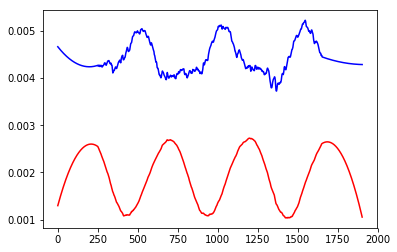

In [38]:
class AnalogSignal_PerNeuronBetweenSignalCorrelation(Analysis):
      """
      Calculates the correlation between two signals (defined by the names of the two values) for each two AnalogSignalList
      that contain those value names, and otherwise match in parameters.
      """

      required_parameters = ParameterSet({
        'value_name1': str,  # the first value name 
        'value_name2': str,  # the second value name 
      })

      def perform_analysis(self):
            for sheet in self.datastore.sheets():
                dsv = queries.param_filter_query(self.datastore, sheet_name=sheet,name='AnalogSignalList',y_axis_name=[self.parameters.value_name1,self.parameters.value_name2])
                dsvs_by_valuename = queries.partition_analysis_results_by_parameters_query(dsv,parameter_list=["y_axis_name"])
                logger.info(len(dsvs_by_valuename))
                for dsv1 in dsvs_by_valuename:
                   dsv1.print_content(full_ADS=True) 
                   asl1 = dsv1.get_analysis_result(y_axis_name=self.parameters.value_name1)[0]
                   asl2 = dsv1.get_analysis_result(y_axis_name=self.parameters.value_name2)[0]
                   vs =[]
                   for i,(a1,a2) in enumerate(zip(asl1.get_asl_by_id(asl1.ids),asl2.get_asl_by_id(asl1.ids))):
                       from scipy.signal import savgol_filter
                       if i == 0:
                         import pylab
                         pylab.figure()
                         pylab.plot(savgol_filter(a1.magnitude.flatten()[100:],501,2),'b',savgol_filter(a2.rescale(a1.units).magnitude.flatten()[100:],501,2),'r')
                         #pylab.title(str(numpy.corrcoef([savgol_filter(a1.magnitude.flatten()[100:],151,2),savgol_filter(a2.rescale(a1.units).magnitude.flatten()[100:],151,2)])))
                         pylab.savefig("smoothed.eps")

                       vs.append(numpy.corrcoef([savgol_filter(a1.magnitude.flatten()[100:],501,2),savgol_filter(a2.rescale(a1.units).magnitude.flatten()[100:],501,2)])[0][1])

                   self.datastore.full_datastore.add_analysis_result(
                          PerNeuronValue(vs, asl1.ids, qt.dimensionless,
                                           stimulus_id=asl1.stimulus_id,
                                           value_name='corrcoef('+ self.parameters.value_name1+ ','+ self.parameters.value_name2 +  ')',
                                           sheet_name=sheet,
                                           tags=self.tags,
                                           analysis_algorithm=self.__class__.__name__,
                                           period=None))

AnalogSignal_PerNeuronBetweenSignalCorrelation(dsv,ParameterSet({'value_name1':'inh. conductance trial-to-trial mean','value_name2' : 'exc. conductance trial-to-trial mean'})).analyse()

  Starting TrialMean analysis


TrialMean analysis took: 6.55789899826seconds
  Starting AnalogSignal_PerNeuronBetweenSignalCorrelation analysis
  1
  DSV info:
     Number of recordings: 0
     Number of ADS: 2
       AnalogSignalList : 2
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList', "name":'AnalogSignalList', "neuron":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":0.0, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "x_axis_name":'time', "y_axis_name":'inh. conductance trial-to-trial mean'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm

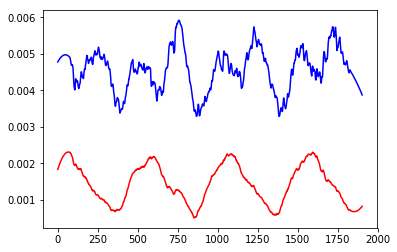

In [11]:
TrialMean(queries.param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating'),ParameterSet({'cond_exc' : True,'cond_inh' : True, 'vm' : False })).analyse()
dsv = param_filter_query(data_store,analysis_algorithm='TrialMean',st_name='FullfieldDriftingSinusoidalGrating',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean','exc. conductance trial-to-trial mean'],st_orientation=0,st_contrast=100)
mozaik.analysis.analysis.AnalogSignal_PerNeuronBetweenSignalCorrelation(dsv,ParameterSet({'value_name1':'inh. conductance trial-to-trial mean','value_name2' : 'exc. conductance trial-to-trial mean'})).analyse()

In [39]:
numpy.mean(param_filter_query(data_store,analysis_algorithm='AnalogSignal_PerNeuronBetweenSignalCorrelation',st_contrast=100).get_analysis_result()[0].get_value_by_id(l4_exc_or_many_analog))

-0.22369021930100186

In [4]:
dsv = param_filter_query(data_store,st_name='FlashedBar',st_relative_luminance=1.0,sheet_name='V1_Exc_L4',st_trial=1)
for s in dsv.get_stimuli():
    print "%.20f" % (MozaikParametrized.idd(s).y)
#dsv = param_filter_query(data_store,st_name='FlashedBar',st_relative_luminance=0.0,st_y=0.33088235294117662733)
#verviewPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neuron' : analog_ids[0], 'sheet_activity' : {}, 'spontaneous' : True}),fig_param={'dpi' : 100,'figsize': (10,10)}).plot({'Vm_plot.y_lim' : (-80,-50),'Conductance_plot.y_lim' : (0,40),'Conductance_plot.x_lim' : (0.04,0.06)})

SyntaxError: invalid syntax (<ipython-input-4-30840f0c75dd>, line 5)

In [4]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neurons' : analog_ids.tolist(), 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()



AssertionError: Error, empty datastore!

  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
RasterPlot plotting took: 23.1740841866seconds
RasterPlot plotting took: 23.1740841866seconds
RasterPlot plotting took: 23.1740841866seconds
RasterPlot plotting took: 23.1740841866seconds


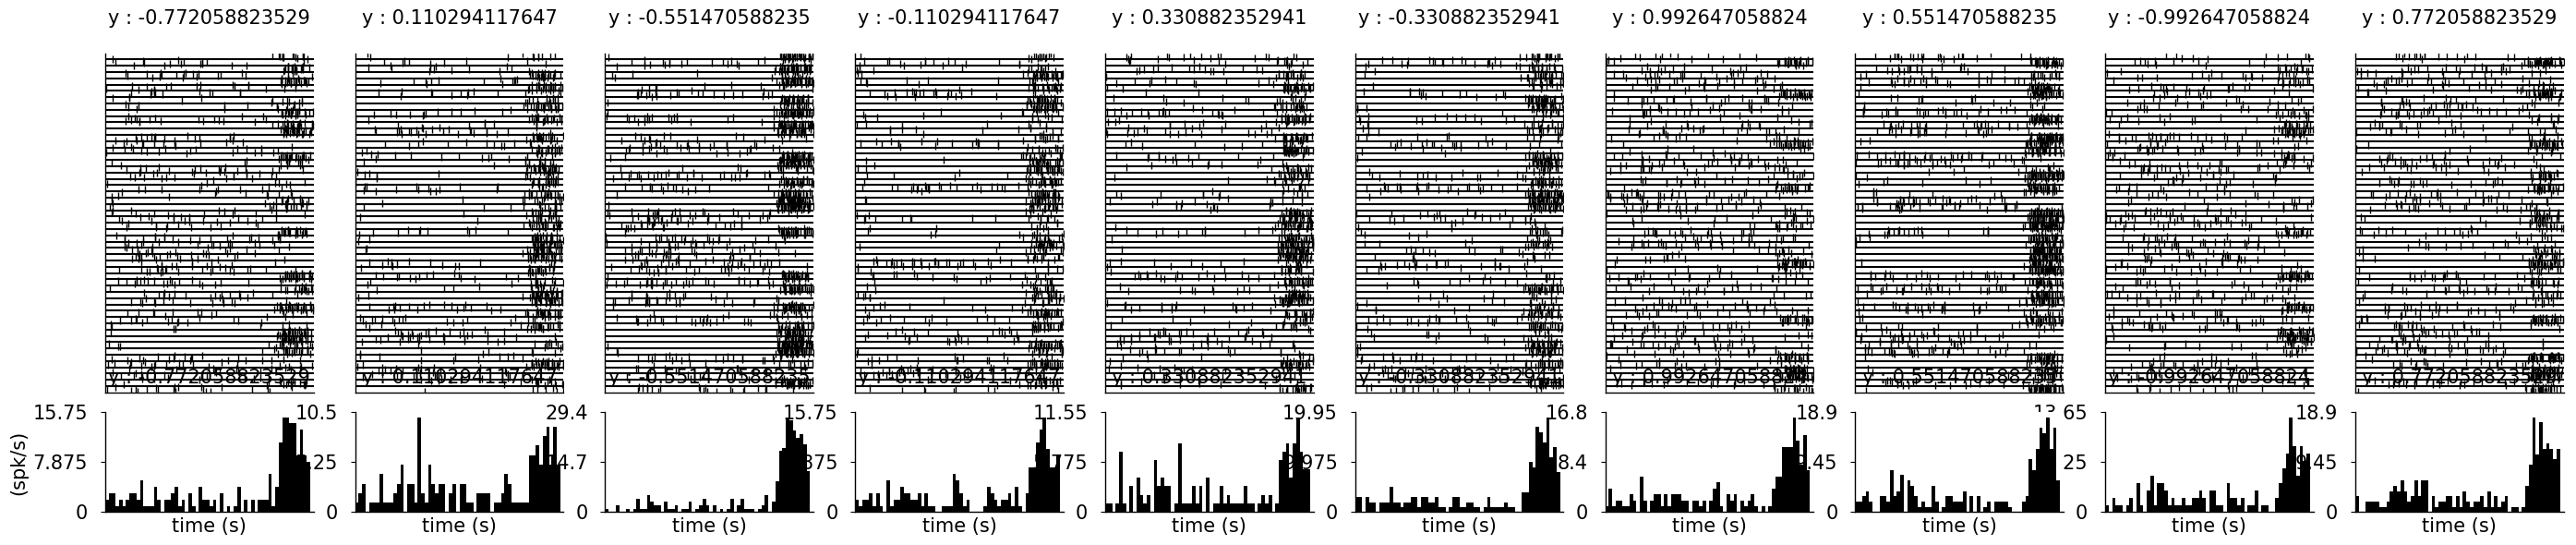

In [18]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'X_OFF', 'neurons' : lgn_off_ids, 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()


  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
  0.3
  0.3
  0.3
  0.3
  0.005
  0.005
  0.005
  0.005
RasterPlot plotting took: 25.3226799965seconds
RasterPlot plotting took: 25.3226799965seconds
RasterPlot plotting took: 25.3226799965seconds
RasterPlot plotting took: 25.3226799965seconds


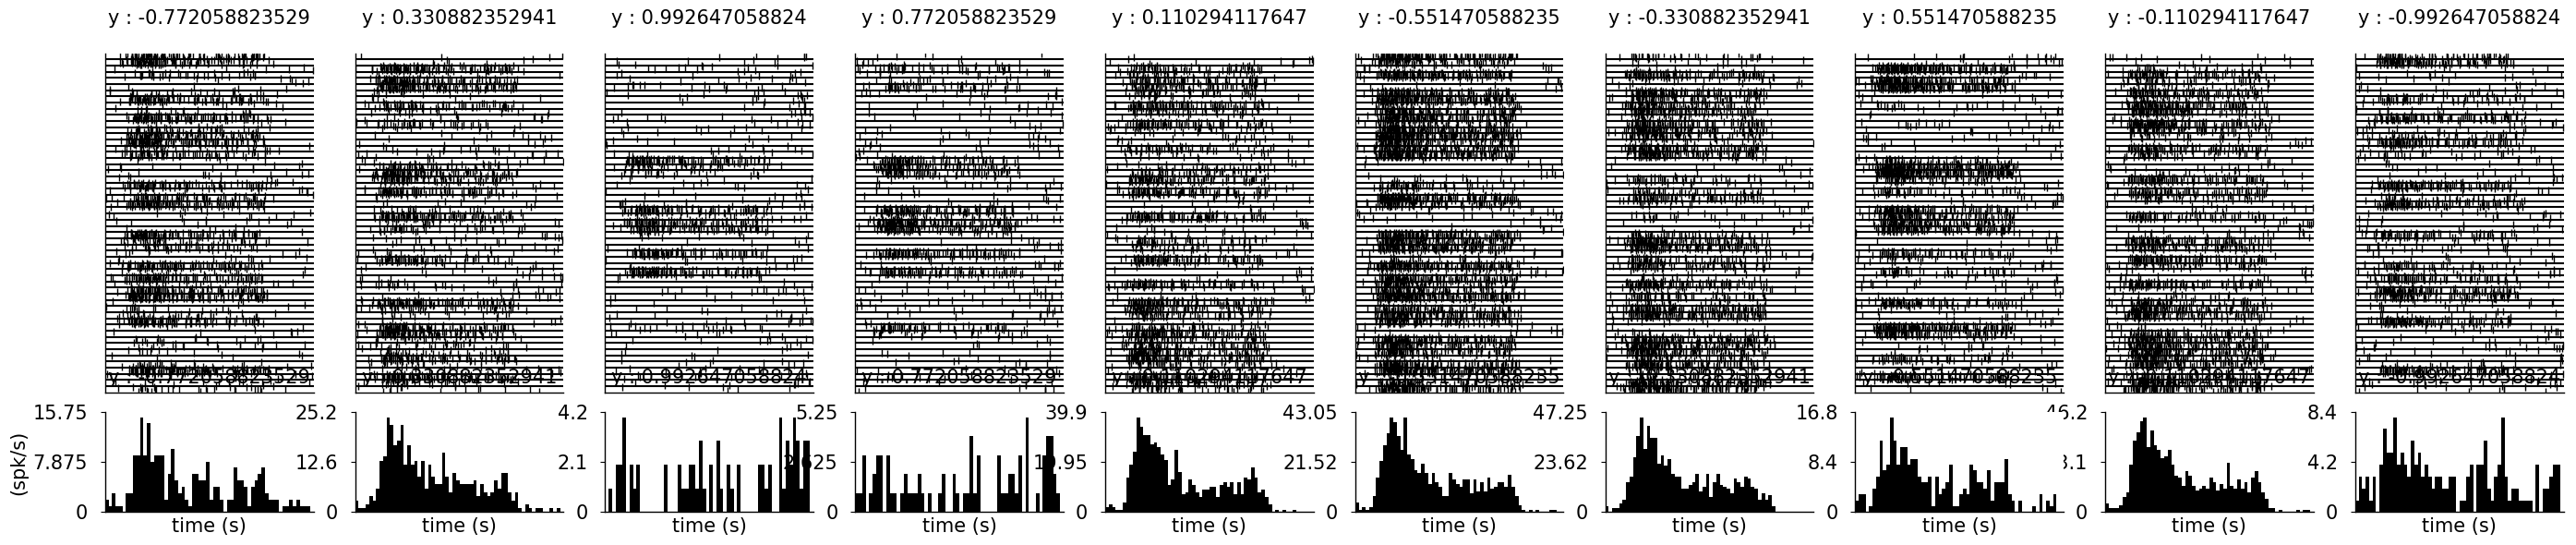

In [19]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'X_ON', 'neurons' : lgn_on_ids, 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()


In [5]:
reload(mozaik.visualization.plotting)

dsv = queries.param_filter_query(data_store,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=1)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [7604,7991], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none', '*.x_lim'  :(0,200),'*.y_label'  : 'offset'})

dsv = queries.param_filter_query(data_store,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=0)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [7604,7991], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none','*.x_lim'  :(0,200),'*.y_label'  : 'offset'})



PlotTemporalTuningCurve plotting took: 0.0641870498657seconds
PlotTemporalTuningCurve plotting took: 0.0219719409943seconds


ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.690325021744seconds
ConnectivityPlot plotting took: 0.687889099121seconds
ConnectivityPlot plotting took: 0.687889099121seconds
ConnectivityPlot plotting took: 0.687889099121seconds
ConnectivityPlot plotting took: 0.687889099121seconds
ConnectivityPlot plotting took: 0.687889099121seconds
ConnectivityPlot plotting took: 0.687889099121seconds


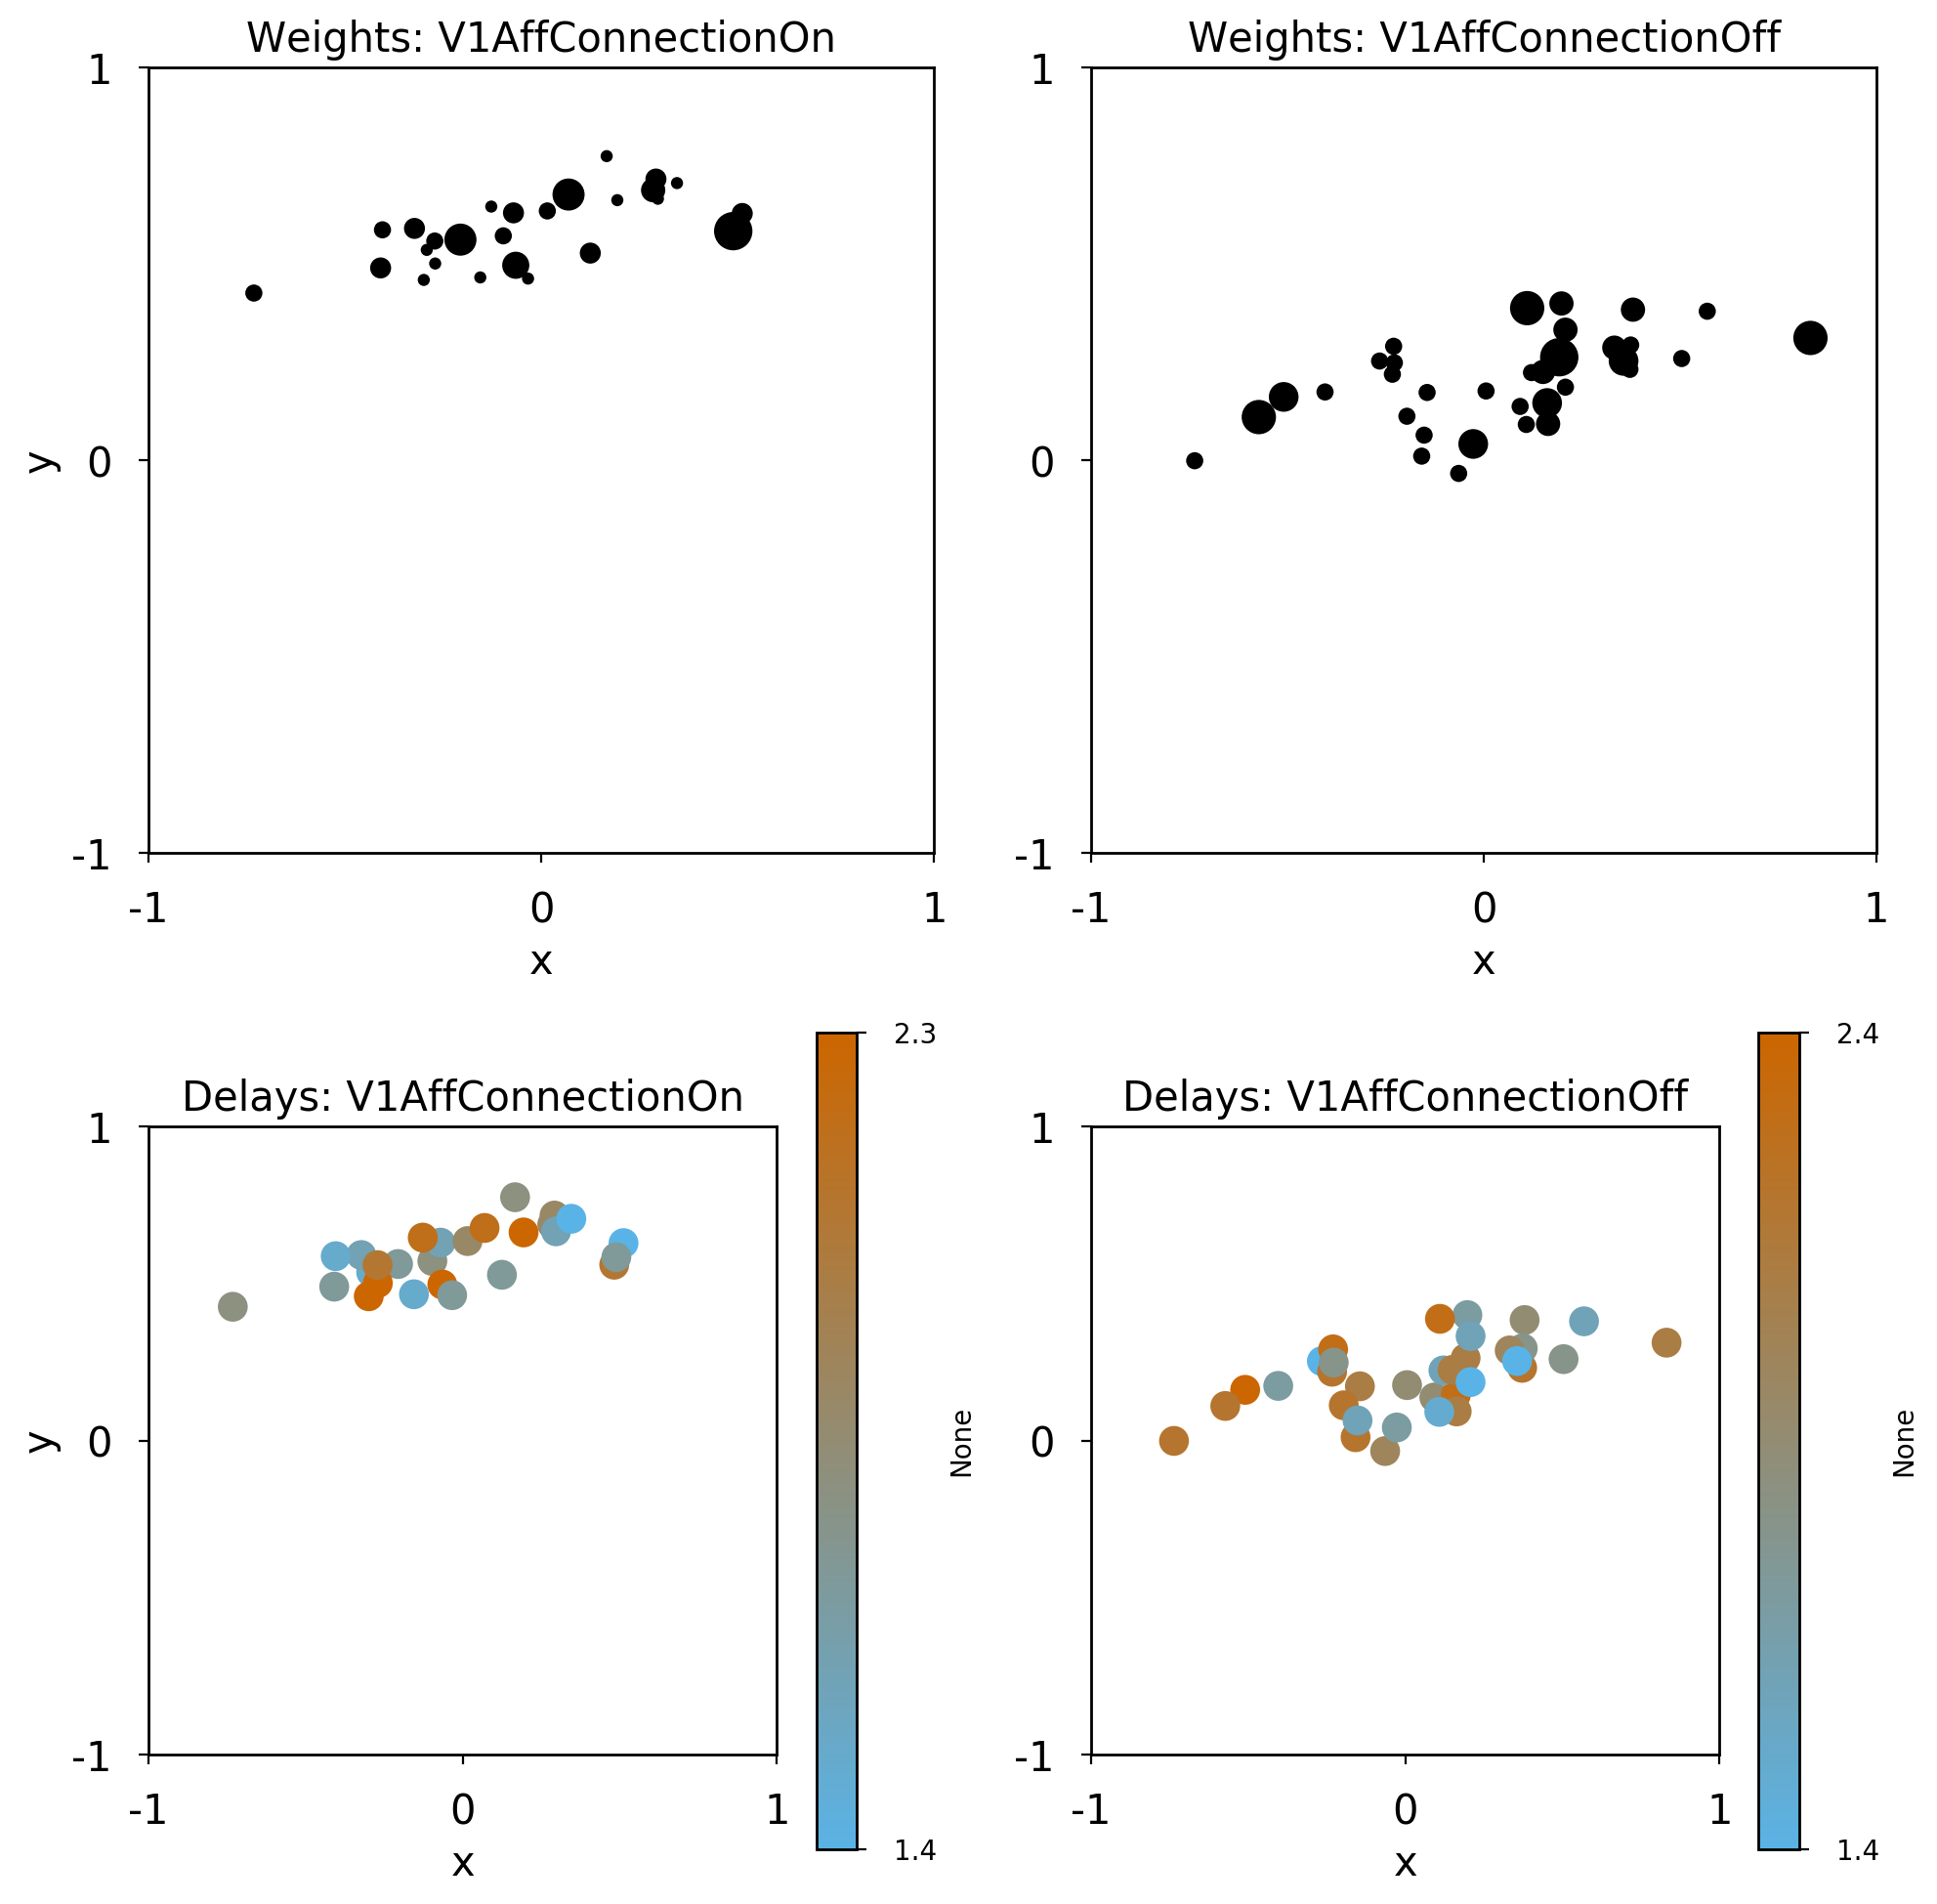

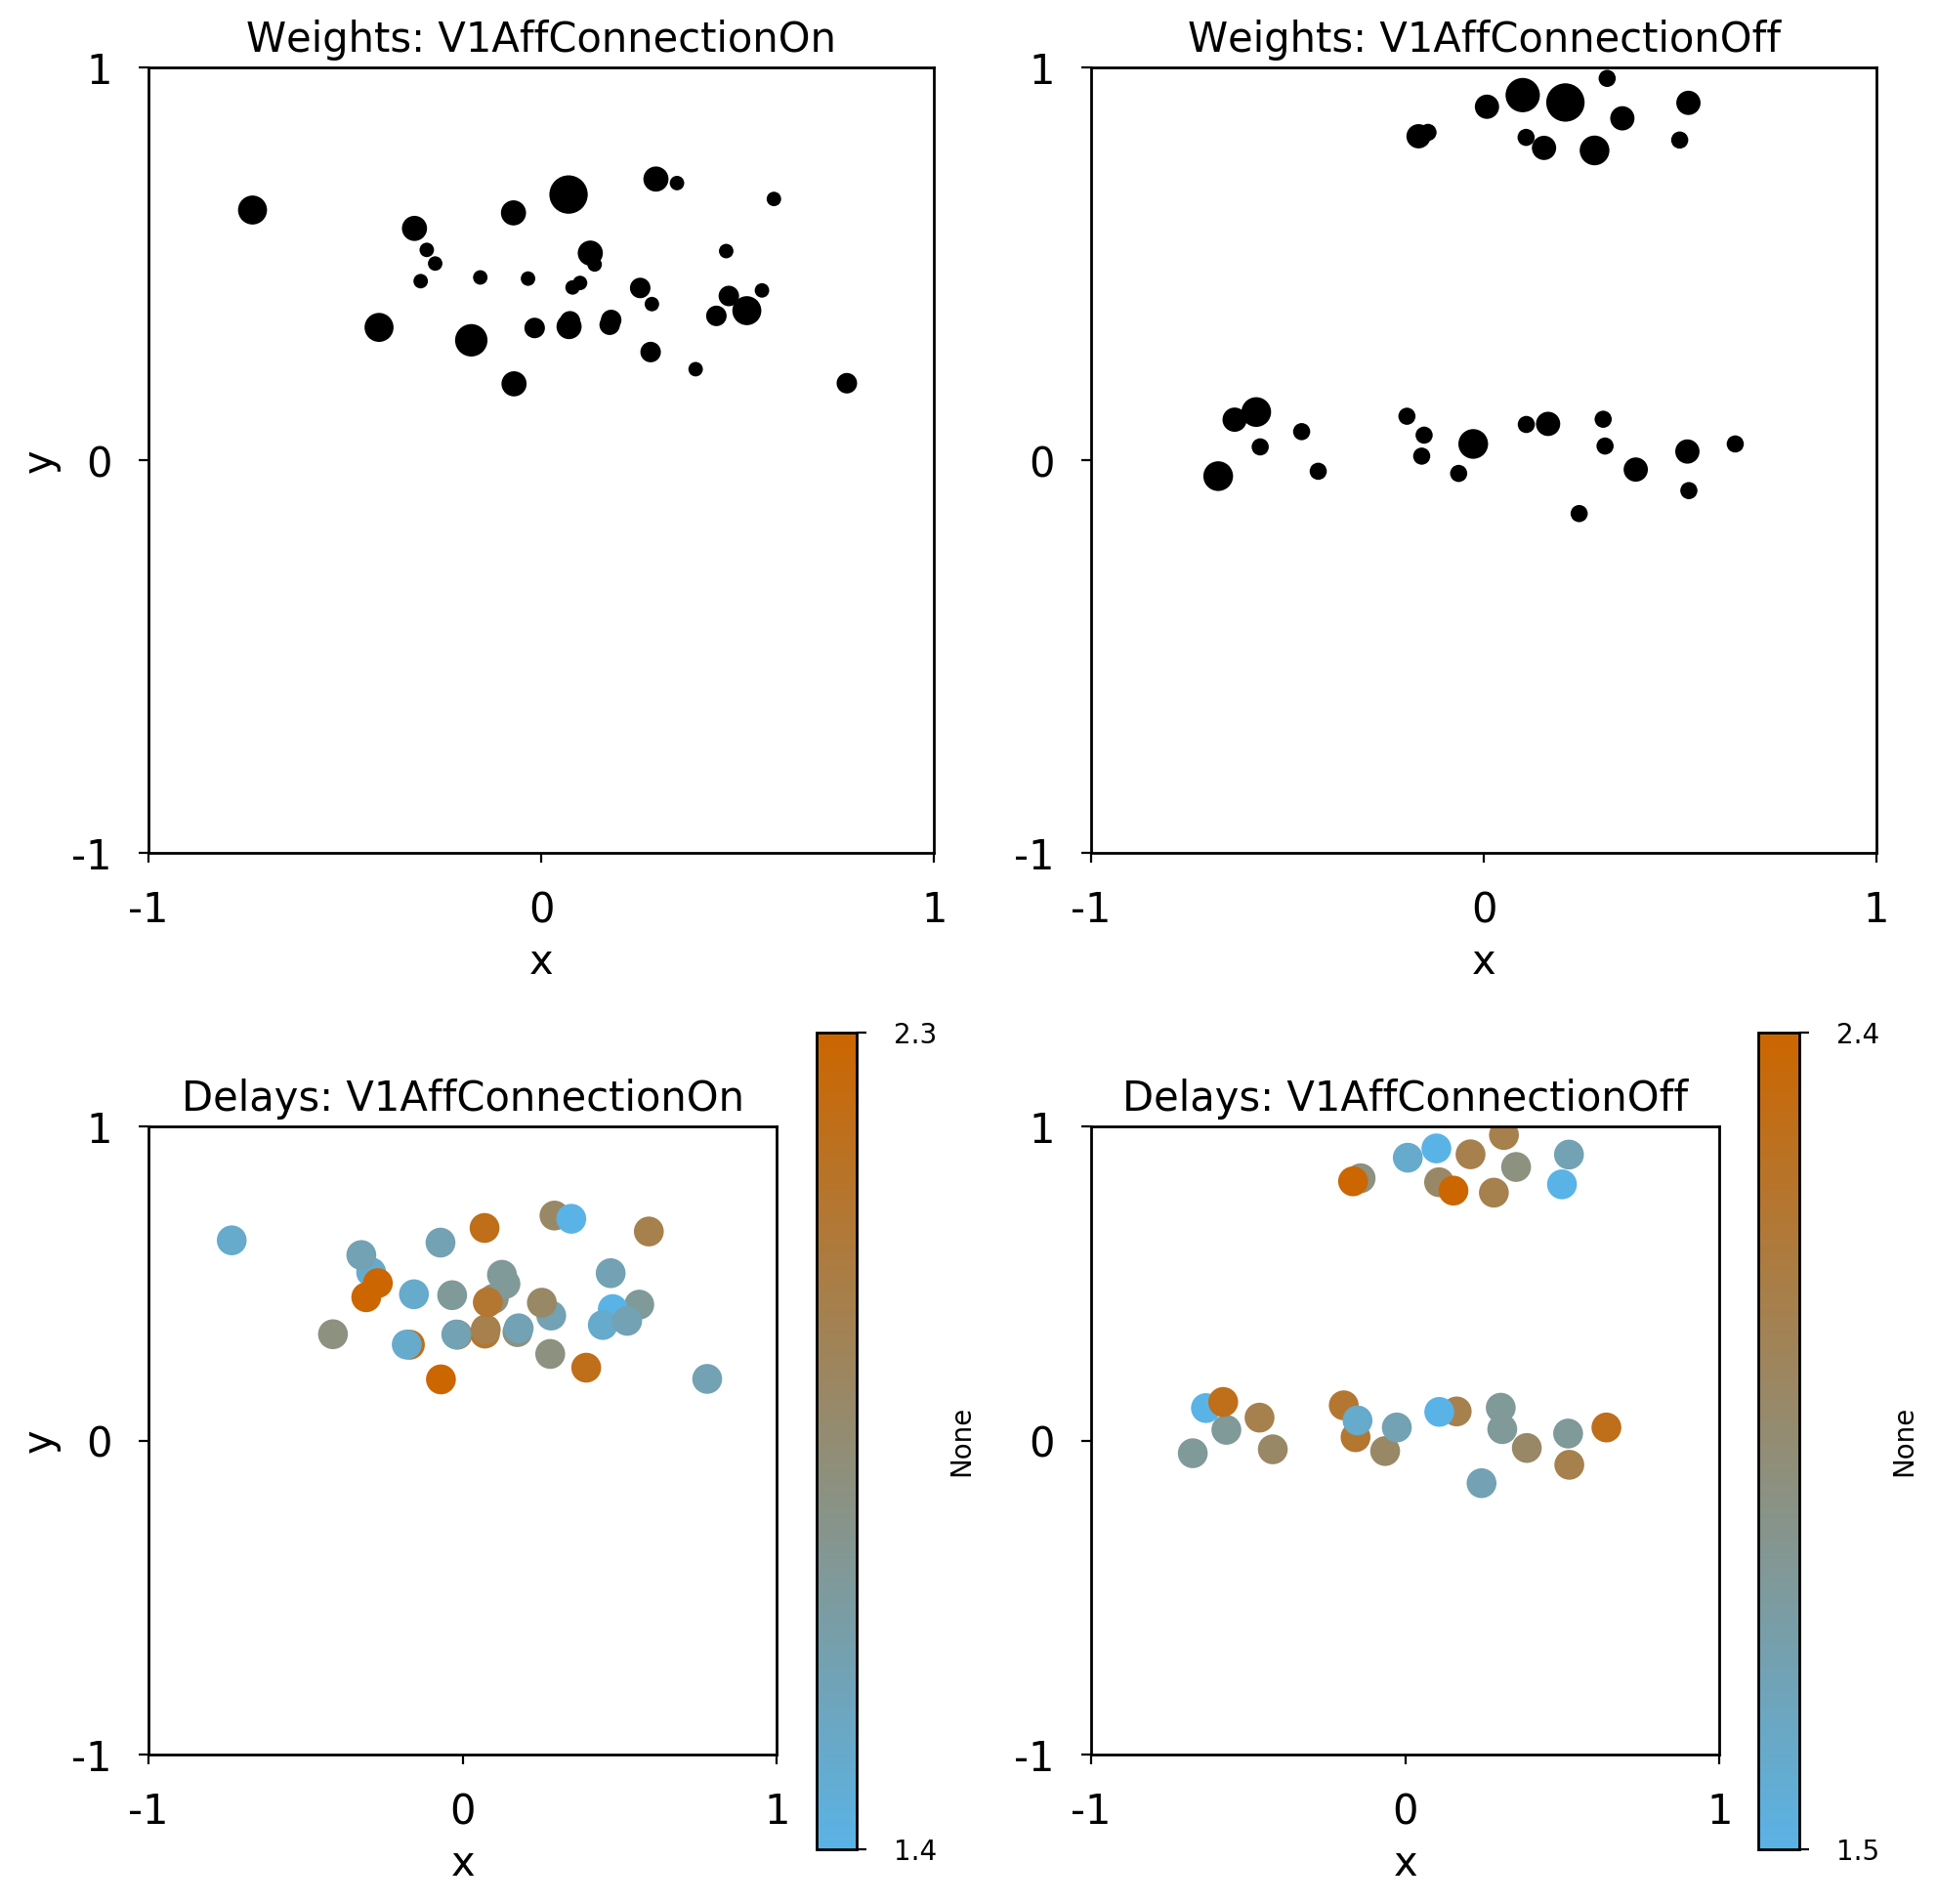

In [44]:
%matplotlib inline
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation',sheet_name='V1_Exc_L4')
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 7604, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (10,10)}).plot()
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 7991, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (10,10)}).plot()

In [35]:
dsv.print_content(full_ADS=True)

  DSV info:
  DSV info:
  DSV info:
  DSV info:
  DSV info:
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of ADS: 2
     Number of ADS: 2
     Number of ADS: 2
     Number of ADS: 2
     Number of ADS: 2
       PerNeuronValue : 2
       PerNeuronValue : 2
       PerNeuronValue : 2
       PerNeuronValue : 2
       PerNeuronValue : 2
  ANALYSIS RESULTS
  ANALYSIS RESULTS
  ANALYSIS RESULTS
  ANALYSIS RESULTS
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":3.141592653589793, "sheet_name":'V1_Exc_L4', "stimulus_id":None, "value_name":'LGNAfferentOrientation'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

In [46]:
queries.param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean').print_content()
AnalogSignal_PerNeuronMeanVar(queries.param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean'),ParameterSet({})).analyse()

  DSV info:
  DSV info:
  DSV info:
  DSV info:
  DSV info:
  DSV info:
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of recordings: 0
     Number of ADS: 1224
     Number of ADS: 1224
     Number of ADS: 1224
     Number of ADS: 1224
     Number of ADS: 1224
     Number of ADS: 1224
       AnalogSignalList : 1224
       AnalogSignalList : 1224
       AnalogSignalList : 1224
       AnalogSignalList : 1224
       AnalogSignalList : 1224
       AnalogSignalList : 1224
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
AnalogSignal_PerNeuronMeanVar analysis took: 851.221168041seconds
AnalogSignal_PerNeuronMeanVar analysis took: 851.221

In [45]:
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanExcCondON.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanInhCondON.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['vm trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanVmON.png').plot()

dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanExcCondOFF.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanInhCondOFF.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['vm trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanVmOFF.png').plot()



AssertionError: Error, empty datastore!

PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3775639534seconds
PlotTuningCurve plotting took: 0.3624792099seconds
PlotTuningCurve plotting took: 0.3624792099seconds
PlotTuningCurve plotting took: 0.3624792099seconds
PlotTuningCurve plotting took: 0.3624792099seconds
PlotTuningCurve plotting took: 0.3624792099seconds
PlotTuningCurve plotting took: 0.3624792099seconds


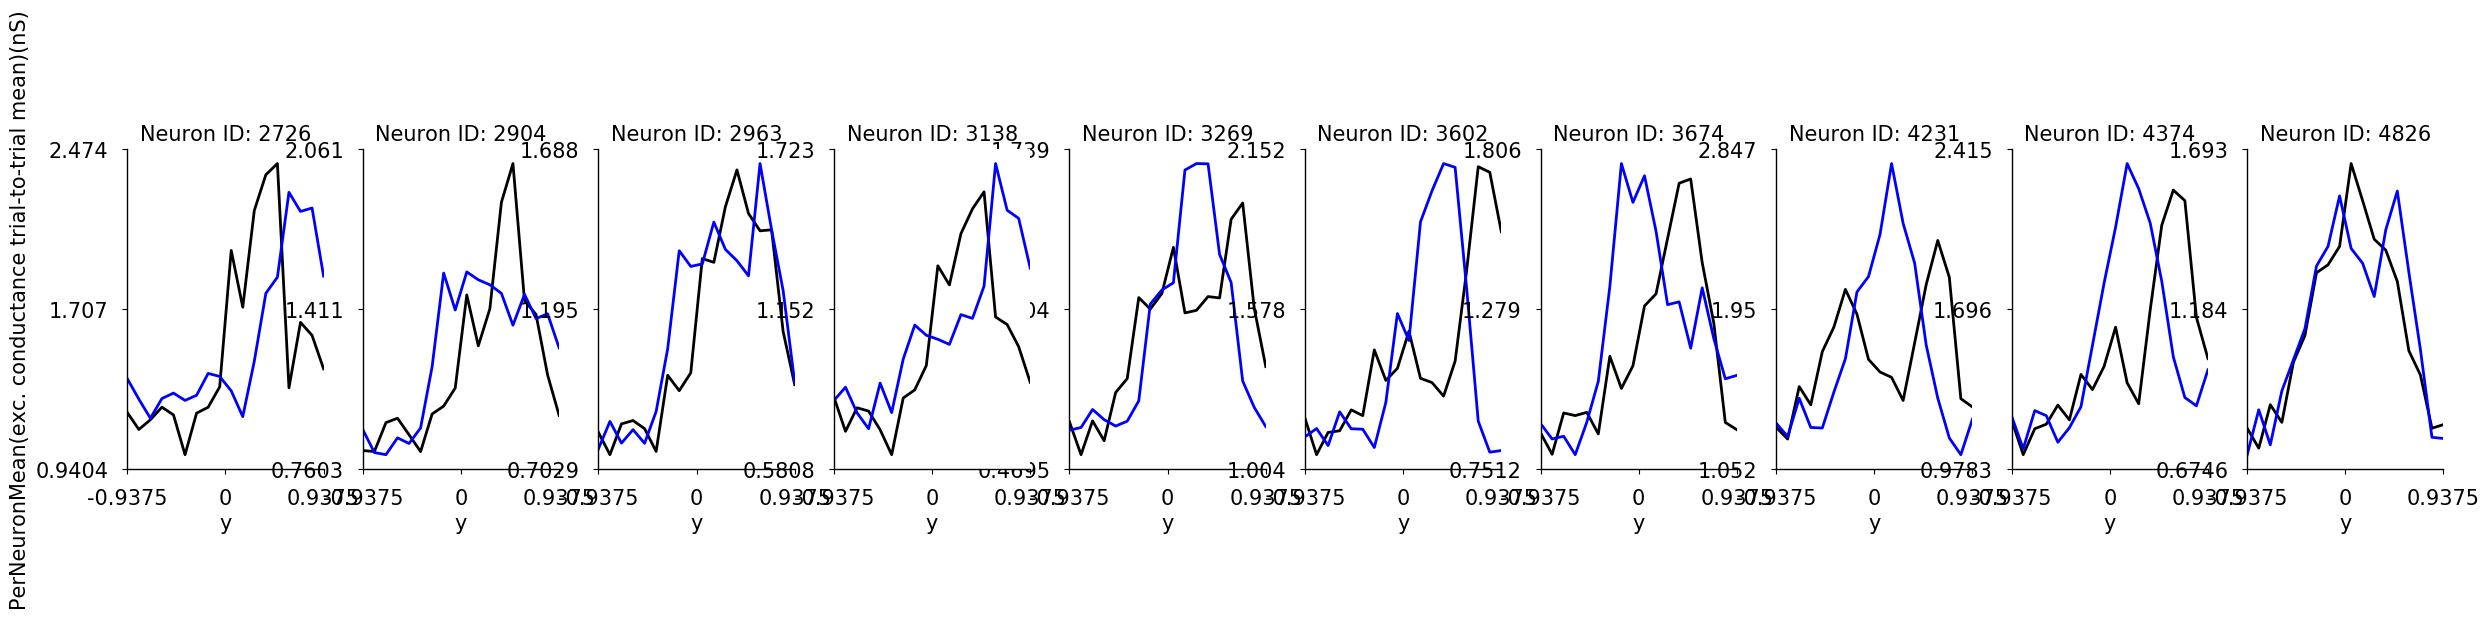

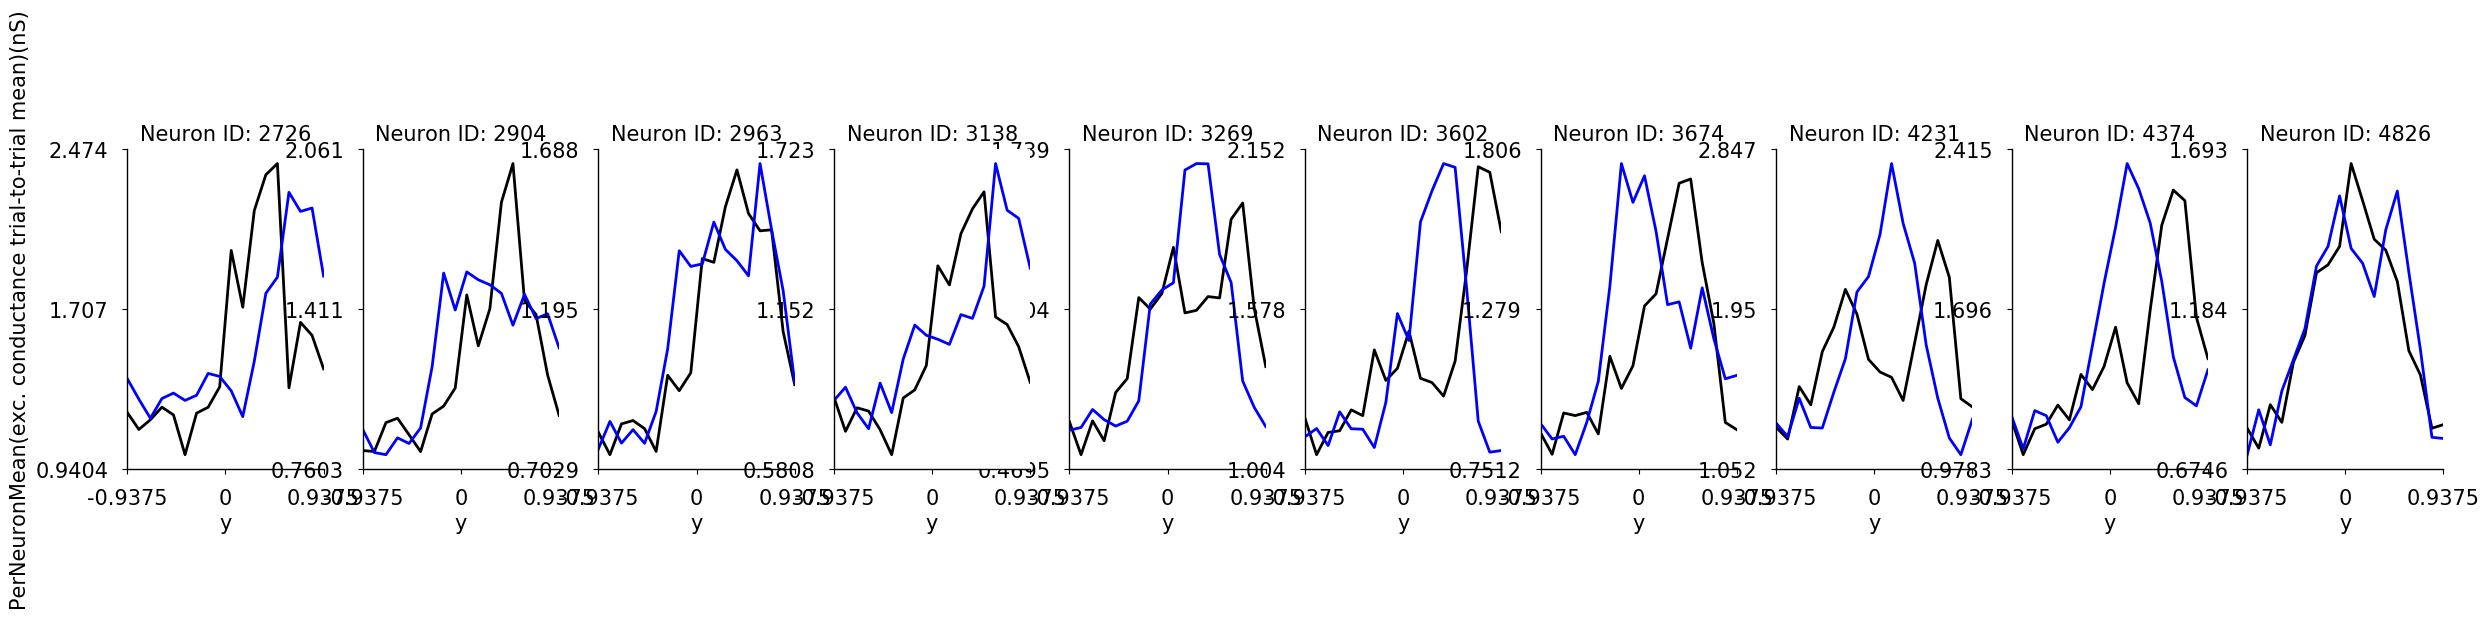

In [48]:
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(exc. conductance trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
mozaik.visualization.plotting.PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(exc. conductance trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
mozaik.visualization.plotting.PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})


PlotTuningCurve plotting took: 0.482109069824seconds


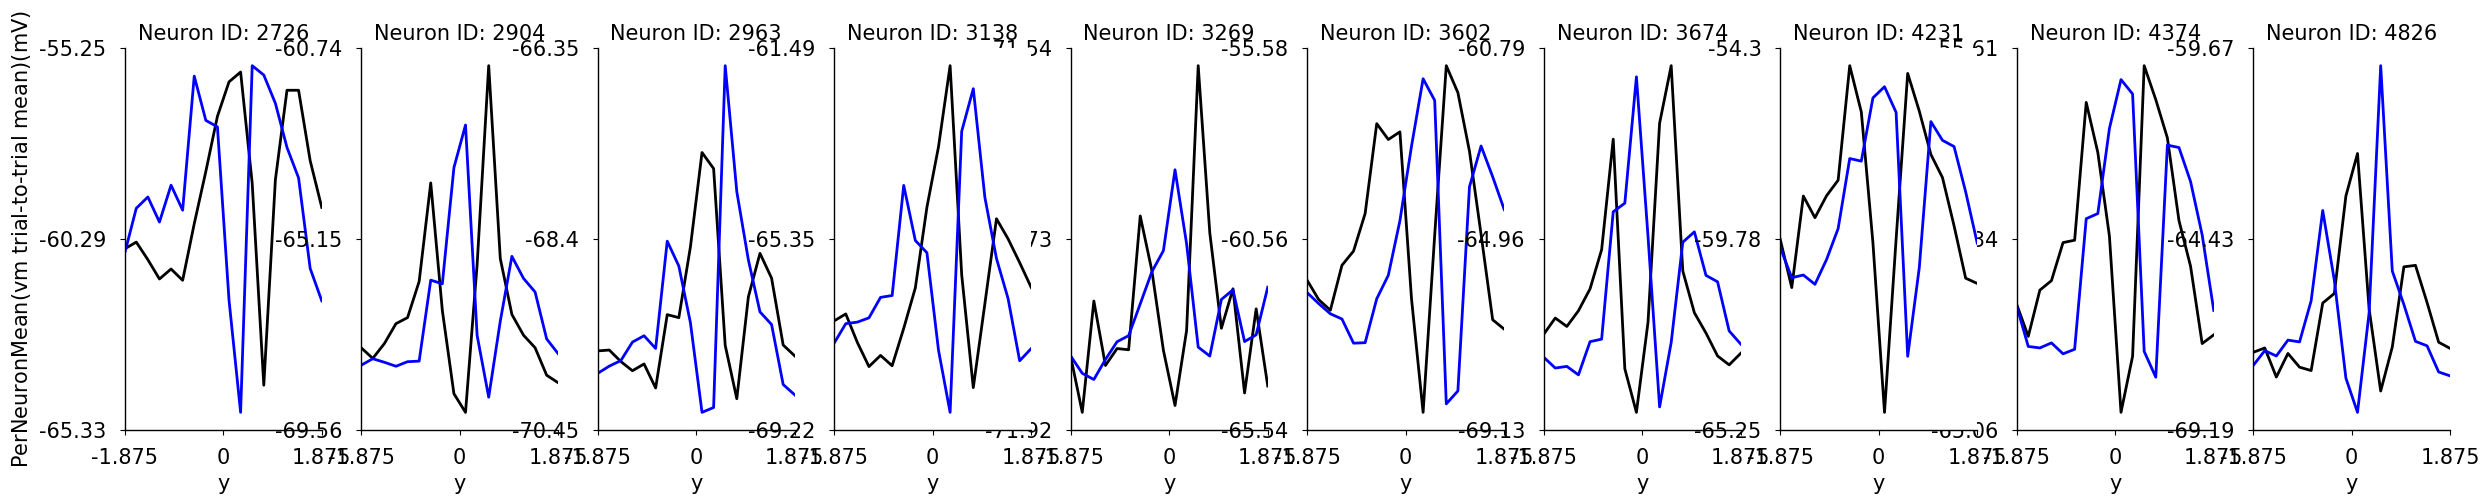

In [24]:
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(vm trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})



In [ ]:
reload(mozaik.visualization.simple_plot)
reload(mozaik.visualization.plotting)

dsv = param_filter_query(data_store,st_name=['FullfieldDriftingSinusoidalGrating'],st_orientation=0.0,st_contrast=100)
mozaik.visualization.plotting.OverviewPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neuron' : numpy.array(list(l4_exc_or_many_analog))[4], 'sheet_activity' : {}, 'spontaneous' : True}),fig_param={'dpi' : 100,'figsize': (7,4)},plot_file_name='Overview_ExcL4_1.png').plot({'Conductance_plot.y_lim' : (0,20)})


In [53]:
import os 

def save_data(dirname,dsv,name):
    try:
        os.mkdir(dirname)
    except:
        'all good'
        
    for neuron_id in analog_ids:
        mat_vm = []
        mat_exc = []
        mat_inh = []
        for seg in dsv.get_segments():
            sid = MozaikParametrized.idd(seg.annotations['stimulus'])
            a = seg.get_vm(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_vm.append(a)
            
            a = seg.get_esyn(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_exc.append(a)

            a = seg.get_isyn(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_inh.append(a)

            
        numpy.savetxt(dirname+'/'+'VM_' + name+str(neuron_id)+'.csv',numpy.array(mat_vm))
        numpy.savetxt(dirname+'/'+'ExcC' + name+str(neuron_id)+'.csv',numpy.array(mat_exc))
        numpy.savetxt(dirname+'/'+'InhC' + name+str(neuron_id)+'.csv',numpy.array(mat_inh))

        
d = 'random_and_fast_afferent_delay_sd=70_weakerinh'
dsv = param_filter_query(data_store,st_name='FlashedBar',sheet_name='V1_Exc_L4',st_relative_luminance=0)    
save_data('/home/antolikjan/Dropbox/ForMorgan/'+d,dsv,'Dark_')
dsv = param_filter_query(data_store,st_name='FlashedBar',sheet_name='V1_Exc_L4',st_relative_luminance=1.0)    
save_data('/home/antolikjan/Dropbox/ForMorgan/'+d,dsv,'Bright_')


/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/mozaik/visualization/simple_plot.py:889: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pylab.hold('on')
/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/

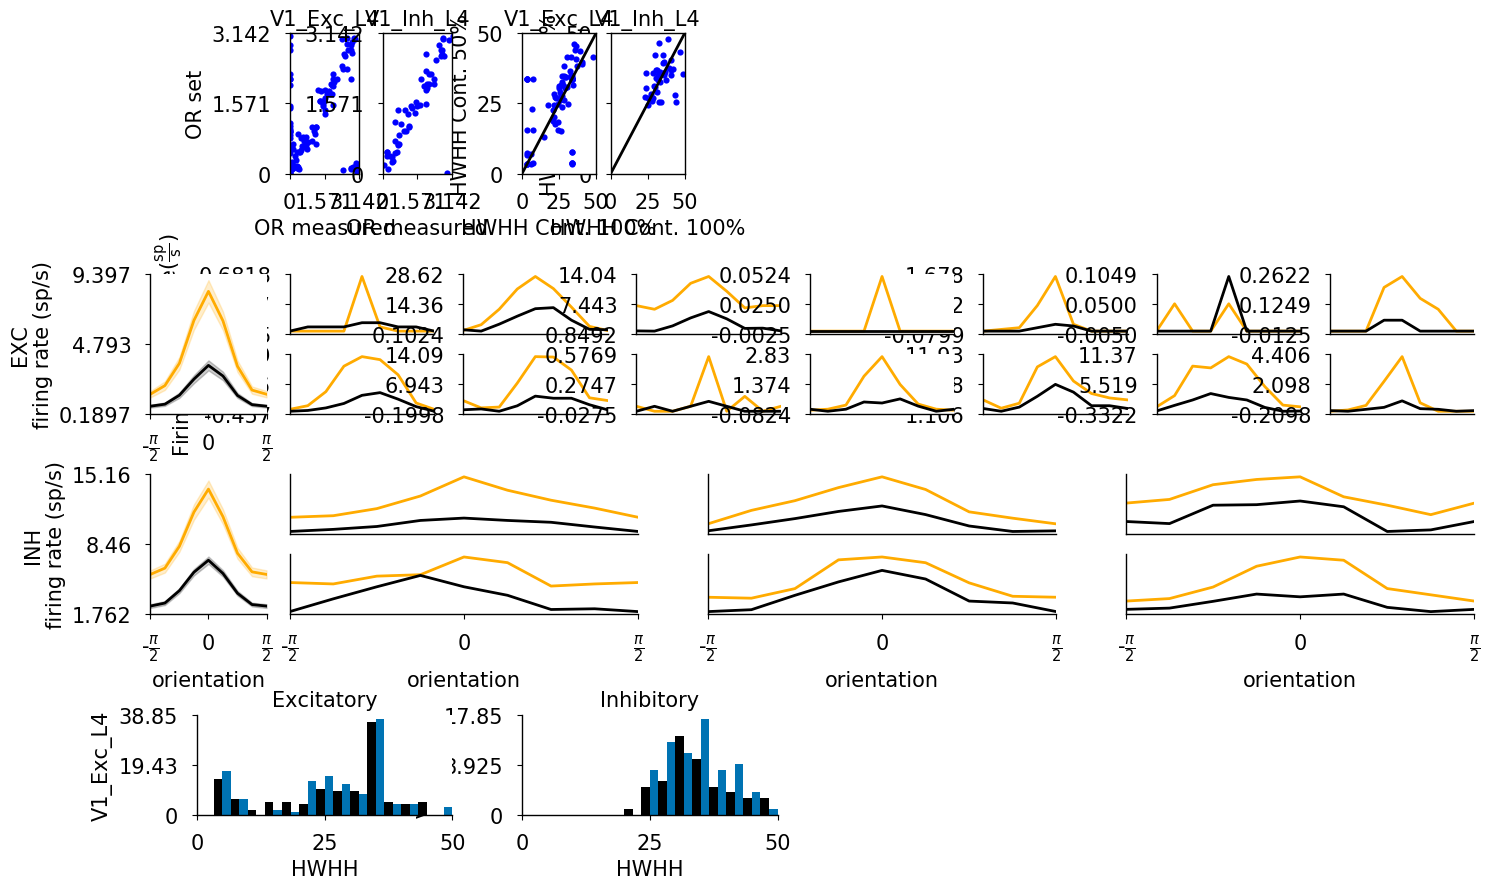

In [6]:
Kremkow_plots.OrientationTuningSummary(data_store,ParameterSet({'exc_sheet_name': 'V1_Exc_L4','inh_sheet_name': 'V1_Inh_L4'}),fig_param={'dpi' : 100,'figsize': (15,9)},plot_file_name='OrientationTuningSummaryL4.png').plot()            



In [ ]:
import mozaik.analysis.analysis
reload(mozaik.analysis.analysis)
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',analysis_algorithm='TrialAveragedFiringRate',sheet_name=sheets)    
mozaik.analysis.analysis.GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()


In [24]:
-z

39.2072438612
4.80866390655
35.5247600205
0.899093124153


(array([ 1.,  3.,  5.,  3.,  1.,  8.,  2.,  2.,  3.,  1.]),
 array([ -9.43397379,  -7.27499466,  -5.11601553,  -2.9570364 ,
         -0.79805728,   1.36092185,   3.51990098,   5.67888011,
          7.83785924,   9.99683837,  12.1558175 ]),
 <a list of 10 Patch objects>)

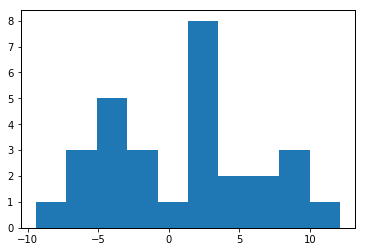

In [25]:
pylab.hist((a-b)[abs(a-b)<1000])